### Outer Solar System Timestep Test

100%|██████████| 400/400 [00:00<00:00, 1384.16it/s]


74.56162171191815


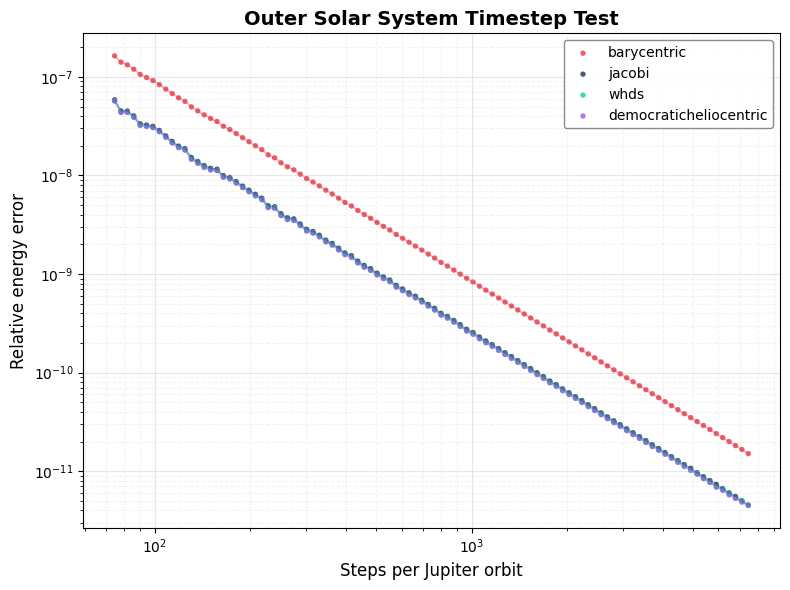

In [ ]:
import rebound
from rebound import data
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor
import tqdm

timesteps = np.logspace(-2, 0, 100)
coordinates = ["barycentric", "jacobi" , "whds", "democraticheliocentric"]
n_coords = len(coordinates)
final_errors = np.zeros((n_coords, len(timesteps)))
def run_sim(params):
    coord, dt = params
    sim = rebound.Simulation()
    sim.integrator = "whfast"
    # if (coord == "barycentric") or (coord == "jacobi"):
    #     sim.ri_whfast.corrector = 3
    # else:
    #     sim.ri_whfast.corrector = 0
    data.add_outer_solar_system(sim)
    sim.move_to_com()
    period = sim.particles[1].P
    sim.ri_whfast.coordinates = coord
    sim.dt = dt   
    max_time = 10 * period
    initial_energy = sim.energy()
    sim.integrate(max_time)
    final_error = np.abs((sim.energy() - initial_energy)/initial_energy)
    sim = None
    return coord, dt, final_error, period

coord_dt_pairs = [(coord, dt) for coord in coordinates for dt in timesteps]
with ProcessPoolExecutor(max_workers=24) as executor:
    results = list(tqdm.tqdm(executor.map(run_sim, coord_dt_pairs),total=len(coord_dt_pairs)))

period = results [0][3]
print(period)
for coord, dt, error, _ in results:
    c_idx = coordinates.index(coord)
    dt_idx = np.where(timesteps == dt)[0][0]
    final_errors[c_idx, dt_idx] = error
    
    
fig = plt.figure(figsize=(8, 6))  # Reduced size for better fit in two-column layout
colors = ["#E63946", "#1D3557", "#06D6A0", "#9B5DE5"]
for c, coord in enumerate(coordinates):
    plt.scatter(period/timesteps, final_errors[c], label=coord, 
                color=colors[c], s=15, alpha=0.8, edgecolor='none')
    plt.plot(period/timesteps, final_errors[c], color=colors[c], alpha=0.4, lw=1.2)

plt.title("Outer Solar System Timestep Test", fontsize=14, fontweight='bold')
plt.xlabel("Steps per Jupiter orbit", fontsize=12)
plt.ylabel("Relative energy error", fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.grid(True, linestyle='-', alpha=0.3)
plt.grid(True, which='minor', linestyle='--', alpha=0.15)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(fontsize=10, framealpha=0.9, edgecolor='gray', loc='upper right')
plt.tight_layout()
plt.show()

fig.savefig("outer_solar_system_timestep.pdf", bbox_inches='tight', dpi=300)

### 2-Body Problem Timestep Test

In [ ]:
import rebound
from rebound import data
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor
import tqdm

timesteps = np.logspace(-2, 0, 200)
coordinates = ["barycentric", "jacobi", "whds", "democraticheliocentric"]
n_coords = len(coordinates)
final_errors = np.zeros((n_coords, len(timesteps)))
def run_sim(params):
    coord, dt = params
    sim = rebound.Simulation()
    sim.integrator = "whfast"
    # sim.add(m=1.)
    # sim.add(m=1.,a=1.,e=0.0)
    sim.add(m=1.)
    sim.add(m=sim.particles[0].m,e=0.,a=5.)
    sim.move_to_com()
    if (coord == "barycentric") or (coord == "jacobi"):
        sim.ri_whfast.corrector = 0
    else:
        sim.ri_whfast.corrector = 0
    period = sim.particles[1].P
    sim.ri_whfast.coordinates = coord
    sim.dt = dt    
    max_time = 100 * period
    initial_energy = sim.energy()
    sim.integrate(max_time)
    final_error = np.abs((sim.energy() - initial_energy)/initial_energy)
    sim = None
    return coord, dt, final_error, period

coord_dt_pairs = [(coord, dt) for coord in coordinates for dt in timesteps]
with ProcessPoolExecutor(max_workers=24) as executor:
    results = list(tqdm.tqdm(executor.map(run_sim, coord_dt_pairs),total=len(coord_dt_pairs)))

period = results [0][3]
for coord, dt, error, _ in results:
    c_idx = coordinates.index(coord)
    dt_idx = np.where(timesteps == dt)[0][0]
    final_errors[c_idx, dt_idx] = error

In [ ]:
fig = plt.figure(figsize=(8, 6))  # Reduced size for better fit in two-column layout
colors = ["#E63946", "#1D3557", "#06D6A0", "#9B5DE5"]
for c, coord in enumerate(coordinates):
    plt.scatter(timesteps, final_errors[c], label=coord, 
                color=colors[c], s=15, alpha=0.8, edgecolor='none')
    plt.plot(timesteps, final_errors[c], color=colors[c], alpha=0.4, lw=1.2)

plt.title("Two Body Problem", fontsize=14, fontweight='bold')
plt.xlabel("Timestep", fontsize=12)
plt.ylabel("Relative energy error", fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.grid(True, linestyle='-', alpha=0.3)
plt.grid(True, which='minor', linestyle='--', alpha=0.15)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(fontsize=10, framealpha=0.9, edgecolor='gray', loc='upper left')
plt.tight_layout()
plt.show()

fig.savefig("2_body_timestep.pdf", bbox_inches='tight', dpi=300)

  0%|          | 0/4000 [00:00<?, ?it/s]/home/luke/AST424/rebound/rebound/simulation.py:259: RuntimeWarning: WHFast convergence issue. Timestep is larger than at least one orbital period.
  warnings.warn(msg[1:], RuntimeWarning)
/home/luke/AST424/rebound/rebound/simulation.py:259: RuntimeWarning: WHFast convergence issue. Timestep is larger than at least one orbital period.
  warnings.warn(msg[1:], RuntimeWarning)
/home/luke/AST424/rebound/rebound/simulation.py:259: RuntimeWarning: WHFast convergence issue. Timestep is larger than at least one orbital period.
  warnings.warn(msg[1:], RuntimeWarning)
/home/luke/AST424/rebound/rebound/simulation.py:259: RuntimeWarning: WHFast convergence issue. Timestep is larger than at least one orbital period.
  warnings.warn(msg[1:], RuntimeWarning)
/home/luke/AST424/rebound/rebound/simulation.py:259: RuntimeWarning: WHFast convergence issue. Timestep is larger than at least one orbital period.
  warnings.warn(msg[1:], RuntimeWarning)
/home/luke/AST4

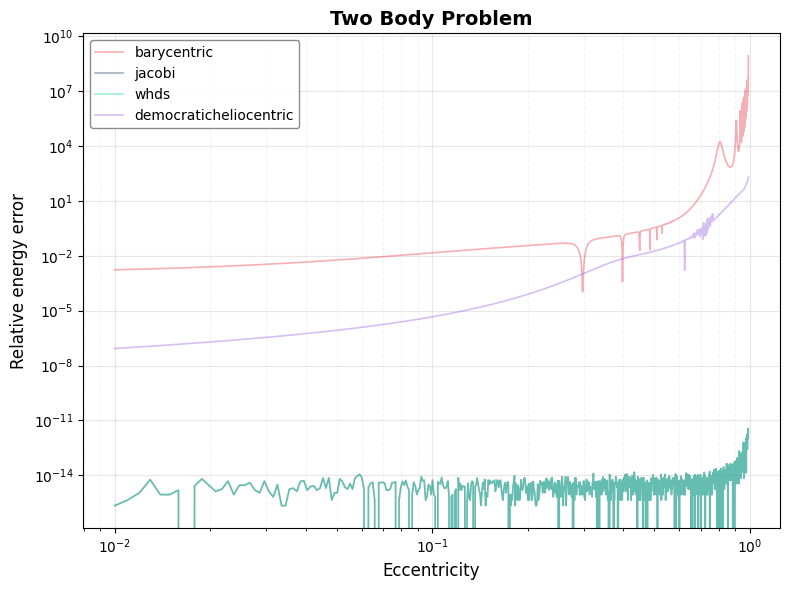

In [1]:
# mass ratio test for 2 body problem 
import rebound
from rebound import data
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor
import tqdm

#timesteps = np.logspace(-2, 0, 200)
#a = np.linspace(1,10,300)
x = np.linspace(0.01, 0.99, 1000)
coordinates = ["barycentric", "jacobi", "whds", "democraticheliocentric"]
n_coords = len(coordinates)
final_errors = np.zeros((n_coords, len(x)))
def run_sim(params):
    coord, x = params
    sim = rebound.Simulation()
    sim.integrator = "whfast"
    # sim.add(m=1.)
    # sim.add(m=1.,a=1.,e=0.0)
    sim.add(m=1.)
    sim.add(m=1.,e=x,a=1)
    sim.move_to_com()
    # if (coord == "barycentric") or (coord == "jacobi"):
    #     sim.ri_whfast.corrector = 3
    # else:
    #     sim.ri_whfast.corrector = 0
    period = sim.particles[1].P
    sim.ri_whfast.coordinates = coord
    sim.dt = 1e-1
    max_time = 10 * period
    initial_energy = sim.energy()
    sim.integrate(max_time)
    final_error = np.abs((sim.energy() - initial_energy)/initial_energy)
    sim = None
    return coord, x, final_error, period

coord_x_pairs = [(coord, val) for coord in coordinates for val in x]
with ProcessPoolExecutor(max_workers=24) as executor:
    results = list(tqdm.tqdm(executor.map(run_sim, coord_x_pairs),total=len(coord_x_pairs)))

period = results [0][3]
for coord, val, error, _ in results:
    c_idx = coordinates.index(coord)
    x_idx = np.where(x == val)[0][0]
    final_errors[c_idx, x_idx] = error
    
fig = plt.figure(figsize=(8, 6))  # Reduced size for better fit in two-column layout
colors = ["#E63946", "#1D3557", "#06D6A0", "#9B5DE5"]
for c, coord in enumerate(coordinates):
    #plt.scatter(a, final_errors[c], label=coord, color=colors[c], s=15, alpha=0.8, edgecolor='none')
    plt.plot(x, final_errors[c], color=colors[c], alpha=0.4, lw=1.2, label=coord)

plt.title("Two Body Problem", fontsize=14, fontweight='bold')
plt.xlabel("Eccentricity", fontsize=12)
plt.ylabel("Relative energy error", fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.grid(True, linestyle='-', alpha=0.3)
plt.grid(True, which='minor', linestyle='--', alpha=0.15)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(fontsize=10, framealpha=0.9, edgecolor='gray', loc='upper left')
plt.tight_layout()
plt.show()

fig.savefig("2_body_semi-major.pdf", bbox_inches='tight', dpi=300)